In [1]:
import pandas as pd

df = pd.read_parquet("data05.parquet")
df["keywords"] = df["keywords"].map(lambda dic: {key: dic[key] for key in dic.keys() if dic[key] != None})

In [2]:
df

,aliases,news,keywords
companies,,,
Banco Comercial Português,"[Banco Comercial Português, BCP]",[{'ExtractedText': 'DN 13 de Setembro de 200...,"{'03 Mar': {'count': 2.0, 'date': {'201503': 2..."
Galp Energia,"[Galp Energia, GALP]",[{'ExtractedText': 'RTP Galp reforça posição n...,"{'00h00': {'count': 7.0, 'date': {'201004': 1...."
EDP,"[EDP, Energias de Portugal, Electricidade de P...",[{'ExtractedText': 'DN-Sinteses Negocios 9 de ...,"{'00h00': {'count': 4.0, 'date': {'201004': No..."
Sonae,"[Sonae, SON]",[{'ExtractedText': 'DN-Sinteses 5 de Março de ...,"{'00h00': {'count': 3.0, 'date': {'201004': No..."
Mota-Engil,"[Mota-Engil, EGL]",[{'ExtractedText': 'RTP Lucro da Mota-Engil so...,"{'15h30': {'count': 2.0, 'date': {'201509': 1...."


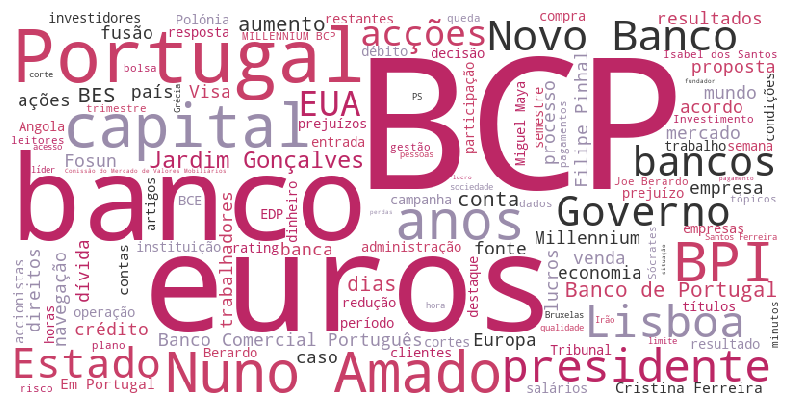

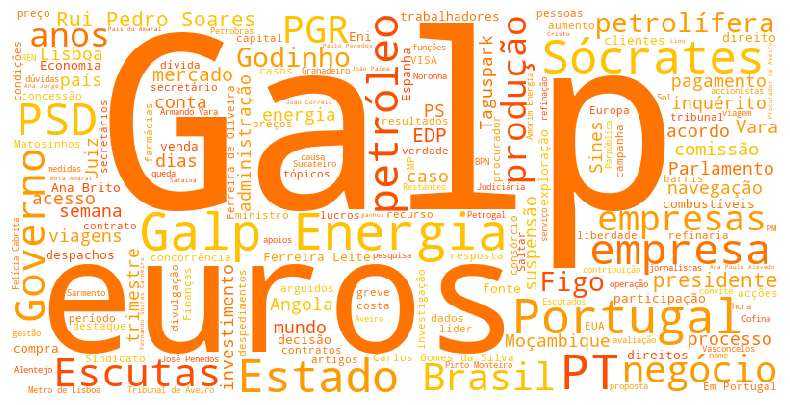

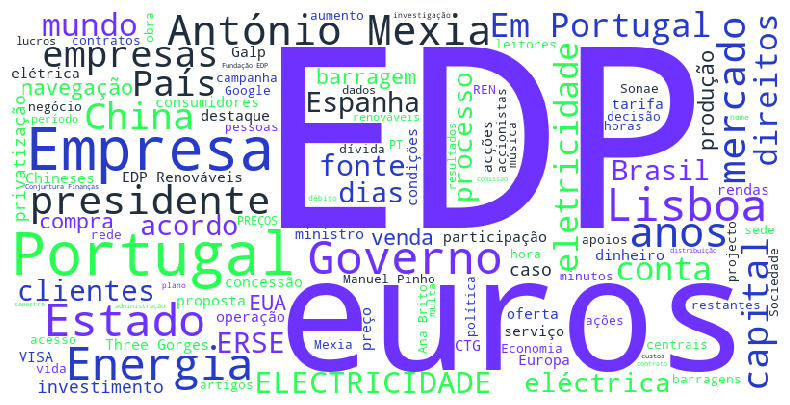

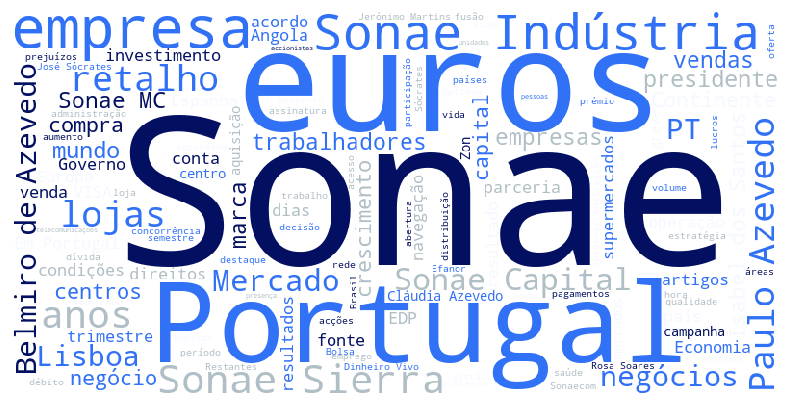

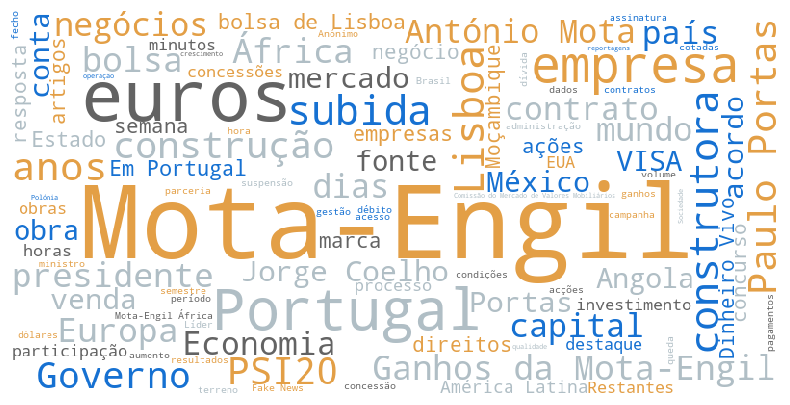

In [3]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import random

dicio = {"BCP": {"pallete": ["#bc2765", "#9a8cab", "#c83f68", "#333333"],
                  "filename": "wordcloud bcp.svg",
                  "linha": 0,
                  "seed": 2},
        "Galp": {"pallete": ["#ffc100", "#ff9a00", "#ff7400", "#ff4d00"],
                  "filename": "wordcloud galp.svg",
                  "linha": 1,
                  "seed": 5},
        "EDP": {"pallete": ["#28FF52", "#212E3E", "#263CC8", "#6D32FF"],
                  "filename": "wordcloud edp.svg",
                  "linha": 2,
                  "seed": 0},
        "Sonae": {"pallete": ["#030f60", "#3171f6", "#f6f8ff", "#b0bec5"],
                  "filename": "wordcloud sonae.svg",
                  "linha": 3,
                  "seed": 28},
        "Mota-Engil": {"pallete": ["#1671d2", "#e39f46", "#636363", "#b0bec5"],
                  "filename": "wordcloud motaengil.svg",
                  "linha": 4,
                  "seed": 8}}
        

for company in dicio.keys():
    word_freq = {word: data["weight"] for word, data in df["keywords"].iloc[dicio[company]["linha"]].items() if data["filter"] >= 0.1}

    # ESCOLHER CORES
    palette = dicio[company]["pallete"]
    def color_function(word, font_size, position, orientation, random_state=None, **kwargs):
        return random.choice(palette)
    # ou
    #from PIL import Image
    #from wordcloud import ImageColorGenerator
    #image = np.array(Image.open('galp1.png').convert('RGB'))
    #color_function = ImageColorGenerator(image)

    wordcloud = WordCloud(width=800, height=400, background_color=None, mode='RGBA').generate_from_frequencies(word_freq)
    plt.figure(figsize=(10, 5))
    random.seed(dicio[company]["seed"])
    plt.imshow(wordcloud.recolor(color_func=color_function), interpolation='nearest')
    plt.axis('off')
    """ 
    # save as svg
    wordcloud_svg = wordcloud.to_svg(embed_font=True)
    f = open(dicio[company]["filename"],"w+")
    f.write(wordcloud_svg )
    f.close()
    """
    plt.show()